In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
import seaborn as sns


from fund_tools import *

In [191]:
mpl_fonts = set(f.name for f in FontManager().ttflist)
matplotlib.rc("font",family='Xingkai')


print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	.Aqua Kana
	.Arabic UI Display
	.Arabic UI Text
	.Keyboard
	.New York
	.SF Compact
	.SF Compact Rounded
	.SF NS Mono
	.SF NS Rounded
	Academy Engraved LET
	Al Bayan
	Al Nile
	Al Tarikh
	American Typewriter
	Andale Mono
	Apple Braille
	Apple Chancery
	Apple LiGothic
	Apple LiSung
	Apple SD Gothic Neo
	Apple Symbols
	AppleGothic
	AppleMyungjo
	Arial
	Arial Black
	Arial Hebrew
	Arial Narrow
	Arial Rounded MT Bold
	Arial Unicode MS
	Athelas
	Avenir
	Avenir Next
	Avenir Next Condensed
	Ayuthaya
	Baghdad
	Bangla MN
	Bangla Sangam MN
	Baoli SC
	Baskerville
	Beirut
	BiauKai
	Big Caslon
	Bodoni 72
	Bodoni 72 Oldstyle
	Bodoni 72 Smallcaps
	Bodoni Ornaments
	Bradley Hand
	Brush Script MT
	Chalkboard
	Chalkboard SE
	Chalkduster
	Charter
	Cochin
	Comic Sans MS
	Copperplate
	Corsiva Hebrew
	Courier New
	DIN Alternate
	DIN Condensed
	Damascus
	DecoType Naskh
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Devana

In [6]:
fund_em_fund_name_df = ak.fund_em_fund_name()
fund_em_fund_name_df

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-偏股,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-偏股,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-长债,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
...,...,...,...,...,...
13626,970063,HAZQHYLGYCYZQ,华安证券合赢六个月持有债券,债券型-混合债,HUAANZHENGQUANHEYINGLIUGEYUECHIYOUZHAIQUAN
13627,970067,XZZGJQLXFSJHHA,兴证资管金麒麟消费升级混合A,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEA
13628,970068,XZZGJQLXFSJHHB,兴证资管金麒麟消费升级混合B,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEB
13629,970069,XZZGJQLXFSJHHC,兴证资管金麒麟消费升级混合C,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEC


In [3]:
fund_em_open_fund_daily_df = ak.fund_em_open_fund_daily()
fund_em_open_fund_daily_df

,基金代码,基金简称,2021-08-13-单位净值,2021-08-13-累计净值,2021-08-12-单位净值,2021-08-12-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费
0,582003,东吴配置优化混合A,2.3095,2.5335,2.2210,2.4450,0.0885,3.98,开放申购,开放赎回,0.15%
1,011707,东吴配置优化混合C,2.3030,2.3030,2.2148,2.2148,0.0882,3.98,开放申购,开放赎回,0.00%
2,002938,中银证券健康产业混合,1.9796,1.9796,1.9287,1.9287,0.0509,2.64,开放申购,开放赎回,0.15%
3,002666,前海开源沪港深创新成长混合A,2.0460,2.1260,1.9940,2.0740,0.0520,2.61,开放申购,开放赎回,0.15%
4,002667,前海开源沪港深创新成长混合C,2.0170,2.0970,1.9660,2.0460,0.0510,2.59,开放申购,开放赎回,0.15%
...,...,...,...,...,...,...,...,...,...,...,...
11702,012172,工银1-3年国开债指数E,,,,,,,开放申购,开放赎回,0.00%
11703,012687,恒越汇优精选三个月混合(FOF),,,,,,,开放申购,开放赎回,0.10%
11704,012783,鹏华长治稳健养老一年持有期混合(FOF),,,,,,,暂停申购,暂停赎回,0.12%
11705,012386,银河颐年稳健养老一年持有混合(FOF),,,,,,,暂停申购,暂停赎回,0.08%


In [4]:
df = pd.merge(fund_em_open_fund_daily_df, fund_em_fund_name_df, on='基金代码')

In [5]:
df

,基金代码,基金简称_x,2021-08-13-单位净值,2021-08-13-累计净值,2021-08-12-单位净值,2021-08-12-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费,拼音缩写,基金简称_y,基金类型,拼音全称
0,582003,东吴配置优化混合A,2.3095,2.5335,2.2210,2.4450,0.0885,3.98,开放申购,开放赎回,0.15%,DWPZYHHHA,东吴配置优化混合A,混合型-灵活,DONGWUPEIZHIYOUHUAHUNHEA
1,011707,东吴配置优化混合C,2.3030,2.3030,2.2148,2.2148,0.0882,3.98,开放申购,开放赎回,0.00%,DWPZYHHHC,东吴配置优化混合C,混合型-灵活,DONGWUPEIZHIYOUHUAHUNHEC
2,002938,中银证券健康产业混合,1.9796,1.9796,1.9287,1.9287,0.0509,2.64,开放申购,开放赎回,0.15%,ZYZQJKCYHH,中银证券健康产业混合,混合型-灵活,ZHONGYINZHENGQUANJIANKANGCHANYEHUNHE
3,002666,前海开源沪港深创新成长混合A,2.0460,2.1260,1.9940,2.0740,0.0520,2.61,开放申购,开放赎回,0.15%,QHKYHGSCXCZHHA,前海开源沪港深创新成长混合A,混合型-灵活,QIANHAIKAIYUANHUGANGSHENCHUANGXINCHENGZHANGHUNHEA
4,002667,前海开源沪港深创新成长混合C,2.0170,2.0970,1.9660,2.0460,0.0510,2.59,开放申购,开放赎回,0.15%,QHKYHGSCXCZHHC,前海开源沪港深创新成长混合C,混合型-灵活,QIANHAIKAIYUANHUGANGSHENCHUANGXINCHENGZHANGHUNHEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11702,012172,工银1-3年国开债指数E,,,,,,,开放申购,开放赎回,0.00%,GY13NGKZZSE,工银1-3年国开债指数E,债券型-长债,GONGYIN13NIANGUOKAIZHAIZHISHUE
11703,012687,恒越汇优精选三个月混合(FOF),,,,,,,开放申购,开放赎回,0.10%,HYHYJXSGYHHFOF,恒越汇优精选三个月混合(FOF),混合型-偏股,HENGYUEHUIYOUJINGXUANSANGEYUEHUNHEFOF
11704,012783,鹏华长治稳健养老一年持有期混合(FOF),,,,,,,暂停申购,暂停赎回,0.12%,PHCZWJYLYNCYQHHFOF,鹏华长治稳健养老一年持有期混合(FOF),混合型-偏债,PENGHUACHANGZHIWENJIANYANGLAOYINIANCHIYOUQIHUN...
11705,012386,银河颐年稳健养老一年持有混合(FOF),,,,,,,暂停申购,暂停赎回,0.08%,YHYNWJYLYNCYHHFOF,银河颐年稳健养老一年持有混合(FOF),混合型-偏债,YINHEYINIANWENJIANYANGLAOYINIANCHIYOUHUNHEFOF


In [6]:
fund_em_money_fund_info_df = ak.fund_em_money_fund_info(fund="000009")
fund_em_money_fund_info_df

,净值日期,每万份收益,7日年化收益率,申购状态,赎回状态
0,2021-08-14,0.5315,2.0130,开放申购,开放赎回
1,2021-08-13,0.5880,2.0160,开放申购,开放赎回
2,2021-08-12,0.5322,1.9900,开放申购,开放赎回
3,2021-08-11,0.5587,1.9950,开放申购,开放赎回
4,2021-08-10,0.5396,1.9900,开放申购,开放赎回
...,...,...,...,...,...
2890,2013-03-29,0.6744,2.8920,开放申购,开放赎回
2891,2013-03-28,0.7068,3.0420,开放申购,开放赎回
2892,2013-03-27,0.3729,3.1750,开放申购,开放赎回
2893,2013-03-26,0.9561,3.4820,开放申购,开放赎回


### 申万一级行业

In [7]:
sw_index_spot_df = ak.sw_index_spot()
sw_index_spot_df

,指数代码,指数名称,昨收盘,今开盘,成交额,最高价,最低价,最新价,成交量
0,801010,农林牧渔,3311.39,3304.41,20340946767.00,3329.43,3285.45,3307.53,1642191502
1,801020,采掘,3220.82,3250.30,35878852992.00,3275.67,3225.48,3233.59,3624107469
2,801030,化工,5061.56,5067.92,149812924177.00,5072.90,4958.02,4975.89,9313362540
3,801040,钢铁,3334.97,3333.37,17849544312.00,3361.29,3280.61,3318.48,3911348693
4,801050,有色金属,6087.49,6057.80,114957125592.00,6088.11,5853.58,5862.48,8103935846
5,801080,电子,5345.25,5326.68,124556183855.00,5390.57,5282.64,5328.75,5668876116
6,801110,家用电器,8380.49,8402.75,18177581893.00,8615.37,8402.75,8604.42,1062656410
7,801120,食品饮料,24824.29,24773.28,38789642073.00,25081.51,24680.35,24946.93,1158503740
8,801130,纺织服装,1792.13,1789.96,7066807659.00,1818.10,1789.96,1809.98,973770947
9,801140,轻工制造,2702.17,2703.16,16287207472.00,2721.99,2698.40,2720.26,1375932942


In [8]:
sw_index_df = ak.sw_index_cons(index_code="801010")
sw_index_df

,stock_code,stock_name,start_date,weight
0,000048,京基智农,2011-10-10 00:00:00,0.4400
1,000505,京粮控股,2018-07-16 00:00:00,0.3081
2,000592,平潭发展,2015-11-03 00:00:00,0.6832
3,000702,正虹科技,2008-06-02 00:00:00,0.1405
4,000713,丰乐种业,2008-06-02 00:00:00,0.6048
...,...,...,...,...
88,603718,海利生物,2016-02-05 00:00:00,0.6006
89,603739,蔚蓝生物,2019-01-04 10:00:00,0.2762
90,605016,百龙创园,2021-04-21 00:00:00,0.1637
91,605198,德利股份,2020-09-18 00:00:00,0.0655


In [35]:
sw_index_df = ak.sw_index_daily(index_code="801010", start_date="2021-08-09", end_date="2021-08-13")
sw_index_df.reset_index().drop('index', axis=1)

,index_code,index_name,date,open,high,low,close,vol,amount,change_pct
0,801010,农林牧渔,2021-08-13,3296.48,3318.88,3265.76,3311.39,16.24,198.00,0.40
1,801010,农林牧渔,2021-08-12,3355.04,3358.27,3293.19,3298.08,14.56,189.91,-1.02
2,801010,农林牧渔,2021-08-11,3324.98,3346.65,3311.16,3331.99,14.82,189.91,-0.41
3,801010,农林牧渔,2021-08-10,3313.78,3356.66,3270.34,3345.69,16.43,235.45,0.90
4,801010,农林牧渔,2021-08-09,3186.31,3319.51,3186.31,3315.81,17.16,239.47,4.09


In [30]:
temp_df['change_pct'][::-1].cumsum()

4    4.09
3    4.99
2    4.58
1    3.56
0    3.96
Name: change_pct, dtype: float64

In [31]:
temp_df = sw_index_df.iloc[:, 3:].astype(float)['close']
temp_df

0    3311.39
1    3298.08
2    3331.99
3    3345.69
4    3315.81
Name: close, dtype: float64

In [27]:
(temp_df['close'][0]-temp_df['close'][4])/temp_df['close'][4]

-0.001333007621063955

In [11]:
sw_index_df = ak.sw_index_daily_indicator(index_code="801760", start_date="2019-12-01", end_date="2019-12-07", data_type="Day")
sw_index_df

,index_code,index_name,date,close,volume,chg_pct,turn_rate,pe,pb,vwap,float_mv,avg_float_mv,dividend_yield_ratio,turnover_pct
0,801760,传媒,2019-12-06,629.75,30.95,1.66,2.0396,38.49,2.22,14.87,"12,025.11",71.58,0.77,6.18
1,801760,传媒,2019-12-05,619.46,22.51,1.07,1.4834,37.88,2.18,14.67,"11,818.01",70.35,0.79,4.57
2,801760,传媒,2019-12-04,612.92,20.06,-0.11,1.3219,37.49,2.16,14.45,"11,703.94",69.67,0.79,4.74
3,801760,传媒,2019-12-03,613.60,21.26,0.01,1.4011,37.55,2.16,14.46,"11,704.71",69.67,0.79,4.85
4,801760,传媒,2019-12-02,613.56,22.82,0.86,1.5061,37.53,2.16,14.49,"11,693.51",69.60,0.79,5.05


In [15]:
industry_list = sw_index_spot_df['指数名称'].values
industry_list

array(['农林牧渔', '采掘', '化工', '钢铁', '有色金属', '电子', '家用电器', '食品饮料', '纺织服装',
       '轻工制造', '医药生物', '公用事业', '交通运输', '房地产', '商业贸易', '休闲服务', '综合',
       '建筑材料', '建筑装饰', '电气设备', '国防军工', '计算机', '传媒', '通信', '银行', '非银金融',
       '汽车', '机械设备'], dtype=object)

In [209]:
ak.sw_index_daily(801760, '2021-01-01', "2021-08-13").set_index('index_code')['close']

index_code
801760    599.91
801760    603.79
801760    605.88
801760    606.97
801760    598.03
           ...  
801760    730.58
801760    708.61
801760    727.70
801760    732.01
801760    739.31
Name: close, Length: 149, dtype: object

In [287]:
def sw_industry_return_plot(start_date, end_date, year_start_date='2021-01-01'):
    
    start_date = pd.to_datetime(start_date, format='%Y/%m/%d')
    end_date = pd.to_datetime(end_date, format='%Y/%m/%d')
    year_start_date = pd.to_datetime(year_start_date, format='%Y/%m/%d')
    
    industry_name = ak.sw_index_spot()['指数名称'].values
    industry_code = ak.sw_index_spot()['指数代码'].values
    
    industry_return_df = pd.DataFrame()
    industry_yearly_return = []
    industry_weekly_return = []
    
    for i in range(len(industry_code)):
        df1 = ak.sw_index_daily(industry_code[i], start_date, end_date)
        temp_df1 = df1.set_index('index_code').iloc[:, 3:].astype(float)['close']
        industry_return = (temp_df1[0] - temp_df1[-1])/temp_df1[-1]
        industry_weekly_return.append(industry_return)
        
        df2 = ak.sw_index_daily(industry_code[i], year_start_date, end_date)
        temp_df2 = df2.set_index('index_code').iloc[:, 3:].astype(float)['close']
        industry_return = (temp_df2[0] - temp_df2[-1])/temp_df2[-1]
        industry_yearly_return.append(industry_return)
    
    industry_return_df['Industry'] = industry_name
    industry_return_df['WeeklyReturn'] = industry_weekly_return
    industry_return_df['YearlyReturn'] = industry_yearly_return
    industry_return_df.index = industry_code
        
    matplotlib.rc("font",family='PingFang HK')


    fig = plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    industry_return_df.sort_values('WeeklyReturn', ascending=True, inplace=True)
    plt.barh(industry_return_df.Industry, industry_return_df.WeeklyReturn)
    for i in range(len(industry_return_df.WeeklyReturn)):
        value_label = str(industry_return_df.WeeklyReturn[i]*100)[:5] + '%'
        plt.annotate(value_label, xy=(industry_return_df.WeeklyReturn[i], 
                                      industry_return_df.Industry[i]), ha='center', va='center', size=15, color='r')
    plt.title(r'本周收益率')
    plt.yticks(industry_return_df.Industry, fontproperties = 'PingFang HK',fontsize = 15);

    plt.subplot(1,2,2)
    industry_return_df.sort_values('YearlyReturn', ascending=True, inplace=True)
    plt.barh(industry_return_df.Industry, industry_return_df.YearlyReturn)
    for i in range(len(industry_return_df.WeeklyReturn)):
        value_label = str(industry_return_df.YearlyReturn[i]*100)[:5] + '%'
        plt.annotate(value_label, xy=(industry_return_df.YearlyReturn[i], 
                                      industry_return_df.Industry[i]), ha='center', va='center', size=15, color='r')
    plt.title(r'今年以来收益率')
    plt.yticks(industry_return_df.Industry, fontproperties = 'PingFang HK',fontsize = 15);
    
    return industry_return_df

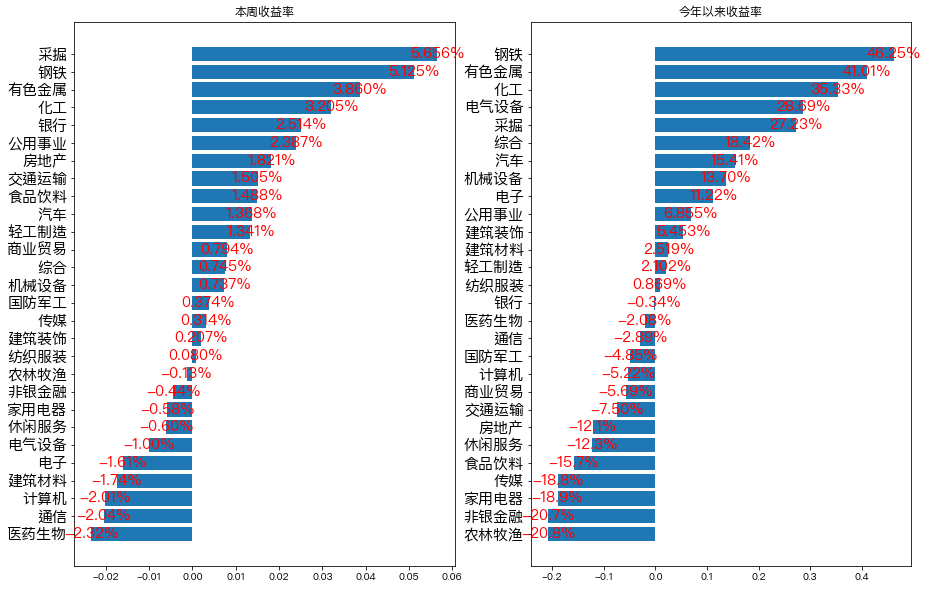

In [288]:
industry_return_df = sw_industry_return_plot(start_date="2021-08-09", end_date="2021-08-13")